
# TensorFlow教程复习

- toc: true
- branch: master
- badges: true
- use_math: true
- comments: true
- categories: [jupyter,tensorflow]
- description: 复习一遍TensorFlow入门教程
---


将分tf2.0与tf1.0两大章节，分别重现TensorFlow教程中的关键章节。

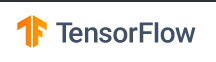

# TensorFlow2.0复习

## keras机器学习基本知识
### 图像分类

该教程训练一个神经网络用于对衣物图像进行分类，如将鞋与衬衫分开。该教程使用`tf.keras`包，它是TF上构建和训练模型的高级API.

In [3]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.0.0


### 导入MNIST流行数据集

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

载入这个数据集后，会得到4个Ndarray:

* `train_images`和`train_labels`数组是训练集 -- 即模型用于学习的数据
* 使用`test_images`和`test_labels`测试集测试模型。

图像是28x28的ndarray，每一个像素的范围都是0,255。标签是一个整形数组，范围为0到9，与图像表征的衣服类型一一对应。

每一幅图像被映射到单个标签上。由于类名不包含于数据集，我们先把类名列出来以待后续使用。

In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 探索数据

训练模型前我们先检查下数据集的格式。以下结果说明训练集中共0.6billion张图片，每幅图片由28*28个像素组成：

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
# 训练集中有60000个标签
len(train_labels)

60000

In [6]:
# 每个标签都是0到9之间的整数
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
# 测试集中有10000张图片，每一幅图也是28*28像素
test_images.shape

(10000, 28, 28)

In [8]:
# 测试集包含10000个标签
len(test_labels)

10000

### 数据预处理

在将数据送入网络前，必须对其进行预处理。如果你查看训练集中的第一幅图片，你会发现像素值在0到255之间：

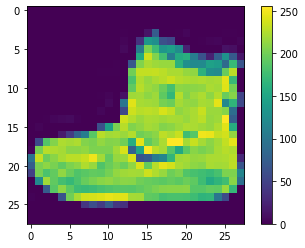

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

在将值送入神经网络模型前，有必要将他们缩放到0到1之间。为了做这个操作，直接将值除255即可。训练和测试集必须以同种方式处理：

In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

为了验证数据是正确格式，且你已经准备好训练和构建网络，我们绘制前43幅图片，并在图片下方显示其类名：

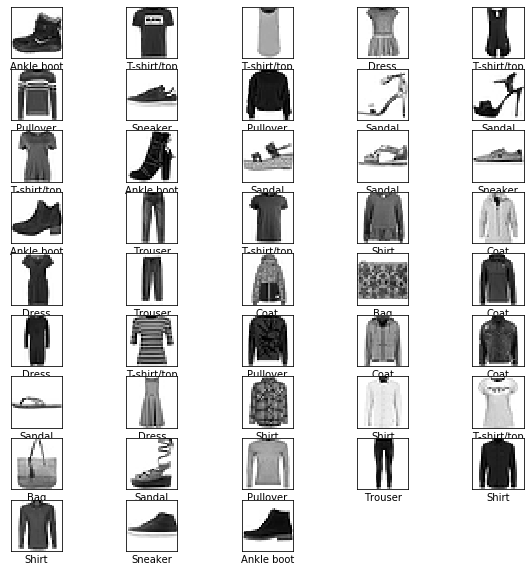

In [15]:
plt.figure(figsize=(10,10))
for i in range(43):
    plt.subplot(9,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### 构建模型
构建神经网络模型需要我们配置网络层，然后编译模型。
#### 设置网络层
神经网络的基本构建单元叫做层。层根据输入数据抽取表征。这些表征对解决手头的问题一般很有意义。

大部分深度学习网络包含级联在一起的简单层。大部分层，例如`tf.keras.layers.Dense`都包含训练过程中学习的参数。

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

网络中的第一层，`tf.keras.layers.Flatten`将图片格式从2维数组转化为1维数组（784个像素）。可以想象它是拆分开像素的各行，再将它们连接起来。这一层没什么特别的参数要学习，它只是重新格式化数据。
在像素被压平之后，网络随即连接两个`tf.keras.layers.Dense`层。这些是紧密连接（或者称作全连接）的神经网络层。第一个`Dense`层有128个节点或者神经元。第二个（输出层）返回一个长度维10的序列，每个值都表示当前图片属于该类别的概率。

### 编译模型
在模型可以训练之前，还需要对它进行一些设置。这些设置是在*compile*步骤完成的：
* 损失函数 - 这个函数衡量模型在训练过程中有多么精确。你的目标是最小化这个函数以使模型朝正确的方向优化。
* 优化器 - 这表示模型如何根据它看到的数据和损失函数去更新参数
* 评估指标 - 用于监控训练和测试步骤，以下的例子用准确率作为指标，即被正确分类的图片占全部图片的比例。

In [8]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

### 训练模型
训练神经网络模型需要以下几个步骤：
1. 将训练数据喂给模型。在例子中，训练数据对应于`train_images`和`train_labels`两个数组；
2. 模型学习关联图片和标签；
3. 你要求模型对测试集进行预测 -- 在这个例子中，既是`test_images`这个数组；
4. 验证预测值与`test_labels`序列的标签对应。
#### 提供数据
为开始训练，调用`model.fit`方法，叫fit的原因是它将模型适配到训练数据的分布上：

In [9]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 105us/sample - loss: 2.4907 - accuracy: 0.7033
Epoch 2/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.6701 - accuracy: 0.7666
Epoch 3/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.5754 - accuracy: 0.8036
Epoch 4/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.5379 - accuracy: 0.8192
Epoch 5/10
60000/60000 [==============================] - ETA: 0s - loss: 0.5175 - accuracy: 0.82 - 4s 67us/sample - loss: 0.5178 - accuracy: 0.8288
Epoch 6/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.5025 - accuracy: 0.8339
Epoch 7/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.4878 - accuracy: 0.8375
Epoch 8/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.4842 - accuracy: 0.8405
Epoch 9/10
60000/60000 [==============================] - 4s 71us/sample - los

随着模型训练，损失和进度指标不断更新，模型最终在训练集达到了91%的精度。

#### 评估精度
其后，我们对比一下模型在测试集上的表现：

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.4512 - accuracy: 0.8165

Test accuracy: 0.8165


我们发现测试集上的精度要稍低于训练集上的精度。两个精度之间的差值说明出现了*过拟合*。在机器学习模型用于新的从未见过的输入时，它的表现变差，认为出现了过拟合。过拟合的模型记住了训练数据中的噪音和细节，以至于影响到模型在新数据上的效果。

#### 预测结果
模型训练完后，我们可以用它来对一些新图片的类别进行预测。模型的原始输出向量称为*对数logits*。通过加入一个softmax层，可以将对数转化为概率分布，使结果更加便于理解。

In [11]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [12]:
predictions = probability_model.predict(test_images)

In [25]:
# 模型对所有测试集中的图片预测了类别，我们看看第一个预测的结果：
predictions[0]

array([3.95853505e-07, 5.04734352e-08, 4.52002773e-08, 1.04268434e-10,
       6.14671819e-07, 4.81123308e-04, 6.37260541e-07, 8.51320755e-03,
       1.08166132e-09, 9.91003871e-01], dtype=float32)

模型预测的类别是一个长度为10的数组。它们表征了模型给图片分属于10个类的“置信度”评价。可以用以下方式知道哪个标签有最大的置信度：

In [26]:
np.argmax(predictions[0])

9

In [27]:
# 所以模型认为图片最可能对应一个ankle boot靴子，或者class_names[9].
# 我们检查一下测试集标签，来证明模型的看法是对的：
test_labels[0]

9

绘制图片来看看所有的预测结果：

In [13]:
def plot_images(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}%({})".format(class_names[predicted_label],
                                      100*np.max(predictions_array),
                                      class_names[true_label],
                                      color=color))
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')    

#### 验证预测结果
模型训练完后，你可以用它进行预测。

我们先看看第1个图片，预测结果，以及对应的概率分布。正确的预测标签是蓝色的，不正确的是红色的。数值给出了预测标签的占比：

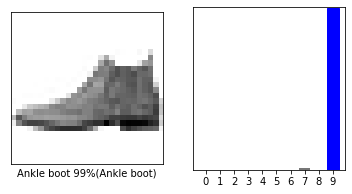

In [42]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i], test_labels)
plt.show()

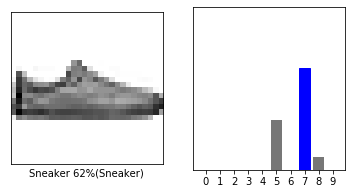

In [44]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i], test_labels)
plt.show()

绘制一些图片和它们的预测结果就会发现，即便模型置信度很高，也可能是错误结果。

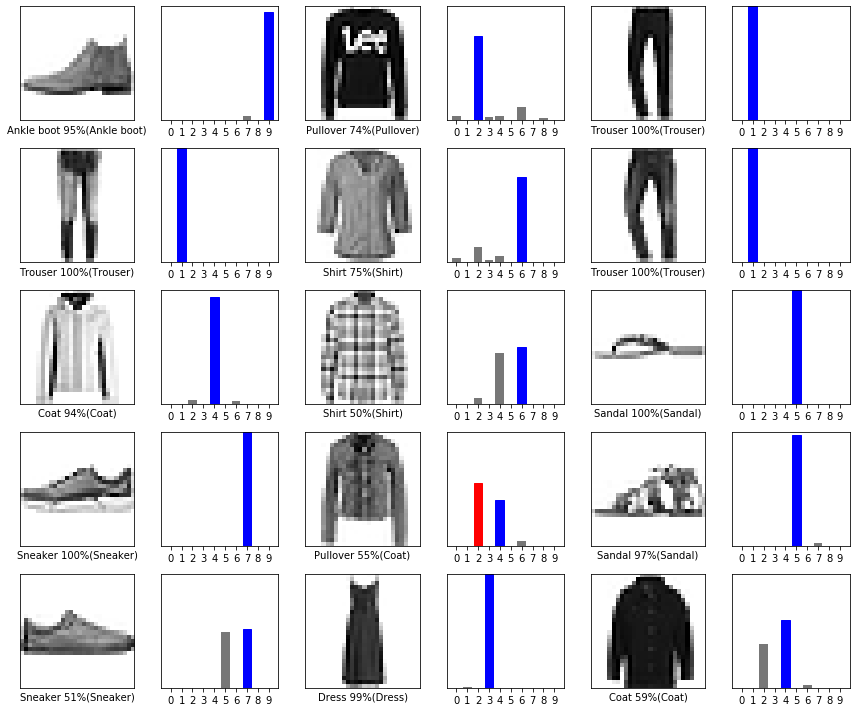

In [16]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=[2*2*num_cols, 2*num_rows])
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_images(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i,predictions[i], test_labels)
    plt.tight_layout()
plt.show()

### 使用训练好的模型
我们终于可以用训练好的模型对单个图片进行分类了：

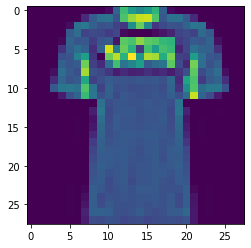

In [20]:
img = test_images[142]
plt.imshow(img)

`tf.keras`模型已经经过优化，们可以对一个“batch”或者几何进行预测。所以即使你只是用单张图片，你也需要将它添加到列表中：

In [21]:
img = (np.expand_dims(img, 0))
print(img.shape)



(1, 28, 28)


In [22]:
# 现在对图片的正确标签进行预测：
predictions_single = probability_model.predict(img)
print(predictions_single)

[[8.6784530e-01 3.4884884e-04 1.2338771e-05 2.0001229e-02 4.8068767e-05
  4.6012540e-17 1.1174188e-01 2.8636104e-37 2.3276600e-06 5.6846246e-34]]


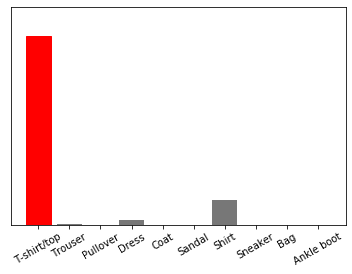

In [23]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=30)

In [24]:
# keras.model.predict 返回一个二维数组，其中每个一维数组都对应
# batch中的一个图片。通过以下方式拿到我们对该批中唯一一幅图片的
# 预测结果：
np.argmax(predictions_single[0])

0

## 文本分类
### 使用 Keras 和 Tensorflow Hub 对电影评论进行文本分类
已有[中文版本](https://www.tensorflow.org/tutorials/keras/text_classification_with_hub?hl=zh_cn),此处仅列出代码。

In [1]:
from __future__ import \
absolute_import, division, \
print_function, unicode_literals

import numpy as np

import tensorflow as tf

import tensorflow_hub as hub
import tensorflow_datasets as tfds

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

Version:  2.0.0
Eager mode:  True
Hub version:  0.8.0
GPU is available


In [31]:
dir(tfds.Split.TRAIN)

['TEST',
 'TRAIN',
 'VALIDATION',
 '__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitli

In [37]:
?tfds.Split.TRAIN.subsplit

Object `tfds.Split.TRAIN.subsplit` not found.


In [2]:
# 将训练集按照 6:4 的比例进行切割，从而最终我们将得到 15,000
# 个训练样本, 10,000 个验证样本以及 25,000 个测试样本

train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=['train[:60%]', 'train[60%:]', tfds.Split.TEST],
    as_supervised=True)

Shuffling and writing examples to C:\Users\henryalps\tensorflow_datasets\imdb_reviews\plain_text\1.0.0.incompleteNJ9POX\imdb_reviews-train.tfrecord


Shuffling and writing examples to C:\Users\henryalps\tensorflow_datasets\imdb_reviews\plain_text\1.0.0.incompleteNJ9POX\imdb_reviews-test.tfrecord


Shuffling and writing examples to C:\Users\henryalps\tensorflow_datasets\imdb_reviews\plain_text\1.0.0.incompleteNJ9POX\imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to C:\Users\henryalps\tensorflow_datasets\imdb_reviews\plain_text\1.0.0. Subsequent calls will reuse this data.


In [3]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
train_examples_batch

<tf.Tensor: id=200, shape=(10,), dtype=string, numpy=
array([b'This is a big step down after the surprisingly enjoyable original. This sequel isn\'t nearly as fun as part one, and it instead spends too much time on plot development. Tim Thomerson is still the best thing about this series, but his wisecracking is toned down in this entry. The performances are all adequate, but this time the script lets us down. The action is merely routine and the plot is only mildly interesting, so I need lots of silly laughs in order to stay entertained during a "Trancers" movie. Unfortunately, the laughs are few and far between, and so, this film is watchable at best.',
       b"Perhaps because I was so young, innocent and BRAINWASHED when I saw it, this movie was the cause of many sleepless nights for me. I haven't seen it since I was in seventh grade at a Presbyterian school, so I am not sure what effect it would have on me now. However, I will say that it left an impression on me... and most of my

In [4]:
train_labels_batch

<tf.Tensor: id=201, shape=(10,), dtype=int64, numpy=array([0, 0, 1, 0, 1, 0, 1, 1, 1, 0], dtype=int64)>

In [5]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)
# 注意这里直接以函数形式调用hub_layer即可得到输出
hub_layer(train_examples_batch[:3])

<tf.Tensor: id=383, shape=(3, 20), dtype=float32, numpy=
array([[ 2.209591  , -2.7093675 ,  3.6802928 , -1.0291991 , -4.1671185 ,
        -2.4566064 , -2.2519937 , -0.36589956,  1.9485804 , -3.1104462 ,
        -2.4610963 ,  1.3139242 , -0.9161584 , -0.16625322, -3.723651  ,
         1.8498232 ,  3.499562  , -1.2373022 , -2.8403084 , -1.213074  ],
       [ 1.9055302 , -4.11395   ,  3.6038654 ,  0.28555924, -4.658998  ,
        -5.5433393 , -3.2735848 ,  1.9235417 ,  3.8461034 ,  1.5882455 ,
        -2.64167   ,  0.76057523, -0.14820506,  0.9115291 , -6.45758   ,
         2.3990374 ,  5.0985413 , -3.2776263 , -3.2652326 , -1.2345369 ],
       [ 3.6510668 , -4.7066135 ,  4.71003   , -1.7002777 , -3.7708545 ,
        -3.709126  , -4.222776  ,  1.946586  ,  6.1182513 , -2.7392752 ,
        -5.4384456 ,  2.7078724 , -2.1263676 , -0.7084146 , -5.893995  ,
         3.1602864 ,  3.8389287 , -3.318196  , -5.1542974 , -2.4051712 ]],
      dtype=float32)>

In [6]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=20,
                    validation_data=validation_data.batch(512),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 6s 198ms/step - loss: 0.7342 - accuracy: 0.5693 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
30/30 [==============================] - 5s 150ms/step - loss: 0.6288 - accuracy: 0.6535 - val_loss: 0.6012 - val_accuracy: 0.6827
Epoch 3/20
30/30 [==============================] - 4s 147ms/step - loss: 0.5822 - accuracy: 0.7035 - val_loss: 0.5648 - val_accuracy: 0.7171
Epoch 4/20
30/30 [==============================] - 5s 151ms/step - loss: 0.5438 - accuracy: 0.7380 - val_loss: 0.5320 - val_accuracy: 0.7472
Epoch 5/20
30/30 [==============================] - 5s 151ms/step - loss: 0.5065 - accuracy: 0.7693 - val_loss: 0.5013 - val_accuracy: 0.7729
Epoch 6/20
30/30 [==============================] - 5s 151ms/step - loss: 0.4721 - accuracy: 0.7935 - val_loss: 0.4707 - val_accuracy: 0.7926
Epoch 7/20
30/30 [==============================] - 5s 151ms/step - loss: 0.4359 - accuracy: 0.8181 - val_loss: 0.4423 - val_accuracy: 0.807

In [8]:
results = model.evaluate(test_data.batch(512), verbose=2)
for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

49/49 - 4s - loss: 0.3167 - accuracy: 0.8648
loss: 0.317
accuracy: 0.865


### 电影评论文本分类
已有[中文版本](https://www.tensorflow.org/tutorials/keras/text_classification?hl=zh_cn)，此处仅列出代码：

In [9]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

2.0.0


In [10]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 2s 0us/step


In [11]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [12]:
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [13]:
# 一个映射单词到整数索引的词典
word_index = imdb.get_word_index()

# 保留第一个索引
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

1646592/1641221 [==============================] - 0s 0us/step


In [14]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [15]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [16]:
?keras.preprocessing.sequence.pad_sequences

Signature:
keras.preprocessing.sequence.pad_sequences(
    sequences,
    maxlen=None,
    dtype='int32',
    padding='pre',
    truncating='pre',
    value=0.0,
)
Docstring:
Pads sequences to the same length.

This function transforms a list of
`num_samples` sequences (lists of integers)
into a 2D Numpy array of shape `(num_samples, num_timesteps)`.
`num_timesteps` is either the `maxlen` argument if provided,
or the length of the longest sequence otherwise.

Sequences that are shorter than `num_timesteps`
are padded with `value` at the end.

Sequences longer than `num_timesteps` are truncated
so that they fit the desired length.
The position where padding or truncation happens is determined by
the arguments `padding` and `truncating`, respectively.

Pre-padding is the default.

# Arguments
    sequences: List of lists, where each element is a sequence.
    maxlen: Int, maximum length of all sequences.
    dtype: Type of the output sequences.
        To pad sequences with variable leng

In [17]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [18]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [19]:
# 输入形状是用于电影评论的词汇数目（10,000 词）
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


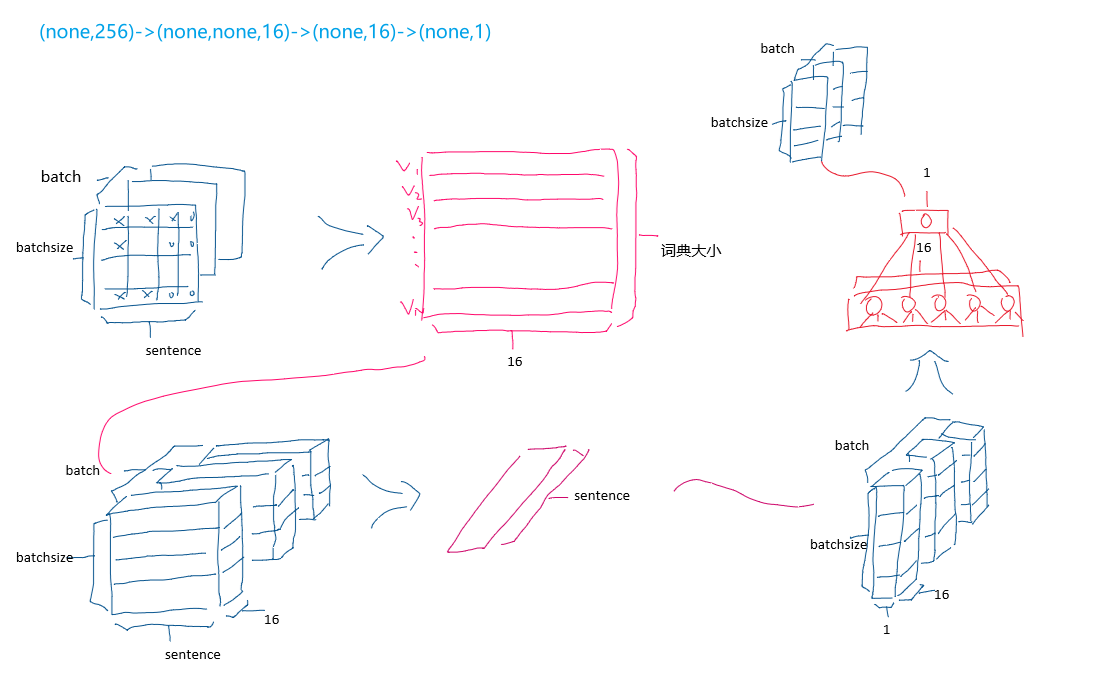

In [20]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 2s 157us/sample - loss: 0.6917 - accuracy: 0.5409 - val_loss: 0.6893 - val_accuracy: 0.6497
Epoch 2/40
15000/15000 [==============================] - 1s 95us/sample - loss: 0.6843 - accuracy: 0.7176 - val_loss: 0.6789 - val_accuracy: 0.7162
Epoch 3/40
15000/15000 [==============================] - 1s 94us/sample - loss: 0.6698 - accuracy: 0.7300 - val_loss: 0.6614 - val_accuracy: 0.7448
Epoch 4/40
15000/15000 [==============================] - 1s 94us/sample - loss: 0.6463 - accuracy: 0.7591 - val_loss: 0.6353 - val_accuracy: 0.7636
Epoch 5/40
15000/15000 [==============================] - 1s 94us/sample - loss: 0.6136 - accuracy: 0.7847 - val_loss: 0.6019 - val_accuracy: 0.7899
Epoch 6/40
15000/15000 [==============================] - 1s 95us/sample - loss: 0.5736 - accuracy: 0.8143 - val_loss: 0.5633 - val_accuracy: 0.8082
Epoch 7/40
15000/15000 [==============================]

In [21]:
results = model.evaluate(test_data,  test_labels, verbose=2)

print(results)

25000/1 - 2s - loss: 0.3204 - accuracy: 0.8729
[0.3223323440361023, 0.87288]


In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

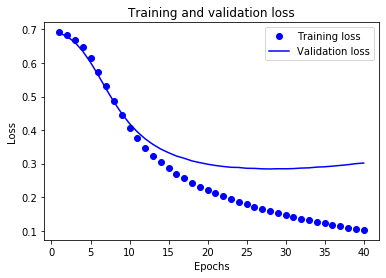

In [23]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# “bo”代表 "蓝点"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b代表“蓝色实线”
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

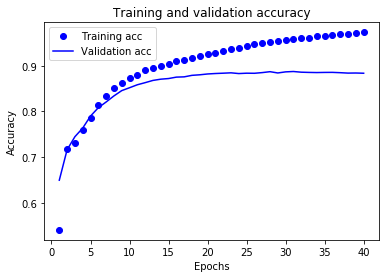

In [24]:
plt.clf()   # 清除数字

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()